# GCP Study

### Setup Steps

After GCP account was established, GCP Storage bucket `batanov` was created. JSON file downloaded from https://coinmarketcap.com/api/ was converted to CSV using an online converter tool https://json-csv.com/ and the resulting file was placed in the bucket.

Downloaded CoinMarketCap file was made publically accessible using GCP web console. It is located at https://storage.googleapis.com/batanov/crypto.csv.

The bucket itself was made accessible to authenticated Google users with `gsutil defacl ch -u allUsers:R gs://batanov`.

Next, CSV file was imported into BigQuery using Create Table wizard. The queries were initially executed using BugQuery web interface.

Then, Datalab notebook was ran locally with `datalab create --verbosity=debug datalab-caserta` and the same queries were executed from this notebook running on port 8081.

The setup was verified by running the following query.

In [2]:
%%bq query
SELECT count(*)
FROM `starry-sunup-200204.crypto.test`

f0_
100


### How many coins have a USD price greater than $6000?

The value was changed to 6000 from the original 8000.

In [5]:
%%bq query
SELECT count(*)
FROM `starry-sunup-200204.crypto.test`
WHERE price_usd > 6000

f0_
1


And it is the Bitcoin

In [6]:
%%bq query
SELECT *
FROM `starry-sunup-200204.crypto.test`
WHERE price_usd > 6000

_id_,name,symbol,rank,price_usd,price_btc,_24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
bitcoin,Bitcoin,BTC,1,6821.87,1.0,5065050000.0,115689535129.0,16958625.0,16958625.0,21000000.0,0.39,-7.41,-12.12,1522904667


### What is the total market cap of the top 100 cryptocurrencies (in USD)?

In [7]:
%%bq query
SELECT sum(market_cap_usd)
FROM `starry-sunup-200204.crypto.test`

f0_
245889965934.0


### Which coins have an available supply less than $5M?

In [8]:
%%bq query
SELECT *
FROM `starry-sunup-200204.crypto.test`
WHERE available_supply < 5000000

_id_,name,symbol,rank,price_usd,price_btc,_24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
digixdao,DigixDAO,DGD,31,203.037,0.029952,13305800.0,406074000.0,2000000.0,2000000.0,,1.22,-11.67,-28.62,1522904646
zcash,Zcash,ZEC,26,183.382,0.0270525,36532600.0,666143138.0,3632544.0,3632544.0,,0.54,-7.87,-10.13,1522904647
byteball,Byteball Bytes,GBYTE,86,168.892,0.024915,139508.0,108972843.0,645222.0,1000000.0,,1.56,-9.66,-10.2,1522904648
maker,Maker,MKR,42,492.087,0.0725927,46436.9,304221849.0,618228.0,1000000.0,,-0.34,-5.64,-14.02,1522904649
veritaseum,Veritaseum,VERI,56,104.044,0.0153485,581217.0,211900738.0,2036645.0,100000000.0,,1.72,-14.8,-25.45,1522904650
zcoin,ZCoin,XZC,77,27.7614,0.00409537,12386200.0,123848435.0,4461174.0,4461174.0,21400000.0,-0.2,-9.72,-13.7,1522904648


### Which 5 coins have seen the greatest percentage growth in the last week?

In [10]:
%%bq query
SELECT *
FROM `starry-sunup-200204.crypto.test`
ORDER BY percent_change_7d desc
LIMIT 5

_id_,name,symbol,rank,price_usd,price_btc,_24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
verge,Verge,XVG,22,0.0561223,8.28e-06,145545000.0,831541915.0,14816604365.0,14816604365.0,16555000000.0,-0.11,-15.61,40.28,1522904643
vertcoin,Vertcoin,VTC,90,2.32519,0.00034301,20182800.0,101477686.0,43642750.0,43642750.0,84000000.0,-3.14,14.96,19.82,1522904641
ontology,Ontology,ONT,27,2.44807,0.00036114,41526400.0,590563719.0,241236451.0,1000000000.0,,2.4,3.25,12.09,1522904661
ardor,Ardor,ARDR,46,0.279858,4.128e-05,26723400.0,279578001.0,998999495.0,998999495.0,998999495.0,-0.55,-16.29,11.85,1522904647
binance-coin,Binance Coin,BNB,16,12.4669,0.00183912,104959000.0,1449421792.0,116261604.0,197192382.0,,0.35,-2.62,9.65,1522904652


### How many ticker symbols contain the letter "X" ?

In [21]:
%%bq query
SELECT *
FROM `starry-sunup-200204.crypto.test`
WHERE symbol LIKE '%X%'

_id_,name,symbol,rank,price_usd,price_btc,_24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
stellar,Stellar,XLM,8,0.203224,2.998e-05,53641400.0,3769993550.0,18550926812.0,103827633055.0,,0.39,-12.0,-3.46,1522904643
monero,Monero,XMR,11,169.583,0.0250169,39622500.0,2696360967.0,15899949.0,15899949.0,,0.26,-8.97,-12.06,1522904644
nem,NEM,XEM,15,0.228305,3.368e-05,46417100.0,2054745000.0,8999999999.0,8999999999.0,,0.57,-8.59,-7.06,1522904644
pivx,PIVX,PIVX,53,3.93694,0.00058078,6798110.0,220117420.0,55910789.0,55910789.0,,1.24,-4.29,-10.37,1522904646
0x,0x,ZRX,48,0.518692,7.652e-05,4947460.0,270711252.0,521911369.0,1000000000.0,,0.35,-10.0,-15.33,1522904652
tron,TRON,TRX,14,0.0318578,4.7e-06,189430000.0,2094592766.0,65748192475.0,100000000000.0,,5.02,-5.33,-32.37,1522904653
icon,ICON,ICX,23,2.03111,0.00029963,34901500.0,786125909.0,387042508.0,400230000.0,,0.49,-8.38,-25.28,1522904655
zcoin,ZCoin,XZC,77,27.7614,0.00409537,12386200.0,123848435.0,4461174.0,4461174.0,21400000.0,-0.2,-9.72,-13.7,1522904648
gxchain,GXChain,GXS,67,2.56181,0.00037792,1059400.0,153708600.0,60000000.0,100000000.0,100000000.0,0.21,-5.92,-6.15,1522904651
cryptonex,Cryptonex,CNX,55,4.73638,0.00069871,1187290.0,214069915.0,45196947.0,106634573.0,210000000.0,1.14,-6.85,-7.64,1522904654


### BigQuery Python API

The dataset above can be used in Python using BigQuery API

In [6]:
import google.datalab.bigquery as bq

In [10]:
q1 = bq.Query('SELECT * FROM `starry-sunup-200204.crypto.test` WHERE price_usd > 6000')
output_options = bq.QueryOutput.table(use_cache=False)
result = q1.execute(output_options=output_options).result()
print(list(result))

[{'rank': 1, 'percent_change_7d': -12.12, 'max_supply': '21000000.0', '_id_': 'bitcoin', 'available_supply': 16958625.0, '_24h_volume_usd': 5065050000.0, 'market_cap_usd': 115689535129.0, 'price_btc': 1.0, 'price_usd': 6821.87, 'last_updated': 1522904667, 'total_supply': 16958625.0, 'symbol': 'BTC', 'percent_change_1h': 0.39, 'percent_change_24h': -7.41, 'name': 'Bitcoin'}]


In [18]:
#convert to Pandas dataframe
df1 = result.to_dataframe()
type(df1)

pandas.core.frame.DataFrame

In [19]:
df1

,_id_,name,symbol,rank,price_usd,price_btc,_24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
0,bitcoin,Bitcoin,BTC,1,6821.87,1.0,5.065050e+09,1.156895e+11,16958625.0,16958625.0,21000000.0,0.39,-7.41,-12.12,1522904667


### Data Visualization

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [24]:
q2 = bq.Query('SELECT symbol, percent_change_7d FROM `starry-sunup-200204.crypto.test` ORDER BY percent_change_7d desc LIMIT 5')
output_options = bq.QueryOutput.table(use_cache=False)
result = q2.execute(output_options=output_options).result()
df2 = result.to_dataframe()

In [25]:
df2

,symbol,percent_change_7d
0,XVG,40.28
1,VTC,19.82
2,ONT,12.09
3,ARDR,11.85
4,BNB,9.65


In [26]:
%matplotlib inline

In [42]:
mpl.rcParams['font.family'] = 'DejaVu Sans'

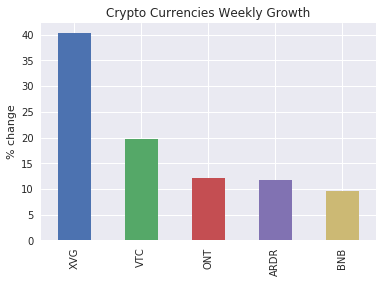

In [43]:
df2['percent_change_7d'].plot(kind='bar')
plt.title('Crypto Currencies Weekly Growth')
plt.ylabel('% change')
plt.xticks(np.arange(5), df2['symbol'])
plt.show()